<a href="https://colab.research.google.com/github/IamLucifer0312/Furniture-Recognition-CNN/blob/henry-task-3/Task3_classify_model_edited_by_henry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import gdown

# Google Drive file ID (from the shared link)
file_id = "1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M"
file_name = "Furniture_Data.zip"
file_path = "/content/" + file_name

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)
print(f"Downloaded: {file_path}")

Downloading...
From (original): https://drive.google.com/uc?id=1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M
From (redirected): https://drive.google.com/uc?id=1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M&confirm=t&uuid=f60d934f-e9ad-44ee-8cbf-27ed36cbffb4
To: /content/Furniture_Data.zip
100%|██████████| 2.49G/2.49G [00:25<00:00, 99.2MB/s]

Downloaded: /content/Furniture_Data.zip


In [3]:
!unzip -q $file_path -d /content/extracted_folder

In [4]:
import os
import shutil

source_dir = "/content/extracted_folder/Furniture_Data"
target_dir = "/content/Task3_Data"


if not os.path.exists(target_dir):
    os.makedirs(target_dir)

for furniture_type in os.listdir(source_dir):
    furniture_path = os.path.join(source_dir, furniture_type)

    if not os.path.isdir(furniture_path):
        continue

    for style in os.listdir(furniture_path):
        style_path = os.path.join(furniture_path, style)

        if not os.path.isdir(style_path):
            continue

        target_style_path = os.path.join(target_dir, style)
        if not os.path.exists(target_style_path):
            os.makedirs(target_style_path)

        for img in os.listdir(style_path):
            img_path = os.path.join(style_path, img)

            if not os.path.isfile(img_path):
                continue

            shutil.move(img_path, target_style_path)

print("Success join all same furrniture type into 1 folder.")

Success join all same furrniture type into 1 folder.


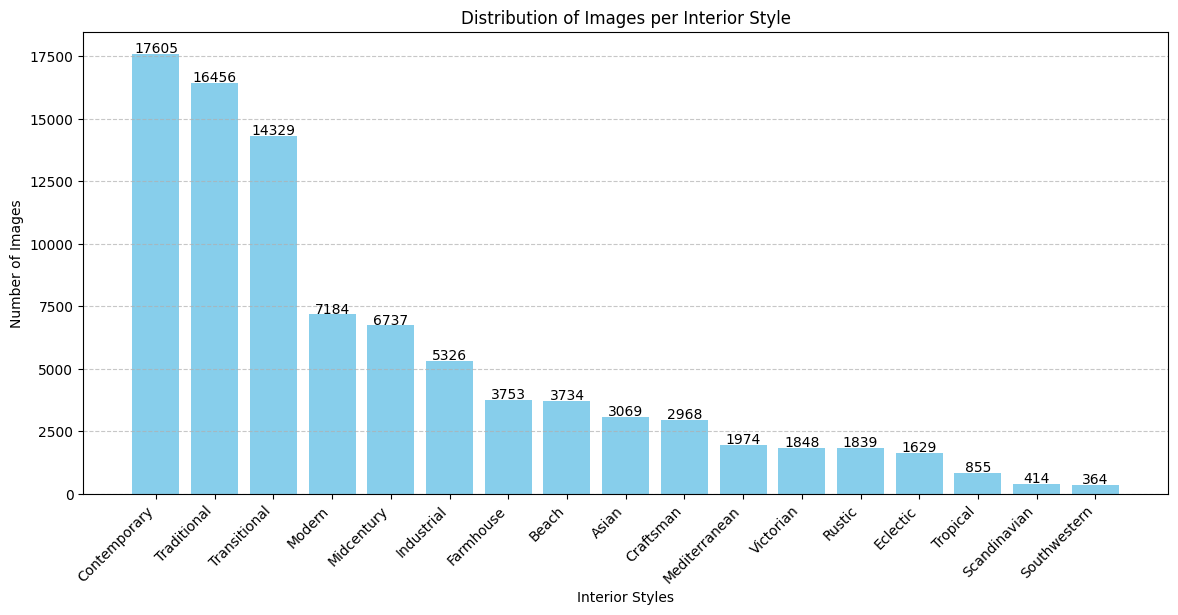

In [5]:
import os
import matplotlib.pyplot as plt

data_dir = "/content/Task3_Data"

style_counts = {}
for style in os.listdir(data_dir):
    if style.startswith("."):
        continue
    style_path = os.path.join(data_dir, style)
    if os.path.isdir(style_path):
        style_counts[style] = len(os.listdir(style_path))

style_counts = dict(sorted(style_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(14, 6))
plt.bar(style_counts.keys(), style_counts.values(), color='skyblue')
plt.xlabel("Interior Styles")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Interior Style")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(style_counts.values()):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

In [6]:
import os
import hashlib
from PIL import Image

data_dir = "/content/Task3_Data"

hashes = set()
deleted_count = 0

def calculate_hash(image_path):
    try:
        with open(image_path, "rb") as f:
            return hashlib.sha256(f.read()).hexdigest()
    except Exception as e:
        print(f"Error when reading {image_path}: {e}")
        return None

for style in os.listdir(data_dir):
    style_path = os.path.join(data_dir, style)

    if not os.path.isdir(style_path):
        continue

    for img in os.listdir(style_path):
        img_path = os.path.join(style_path, img)
        try:
            with Image.open(img_path) as im:
                im.verify()
        except:
            print(f"Not valid image: {img_path}")
            continue

        img_hash = calculate_hash(img_path)
        if img_hash is None:
            continue

        if img_hash in hashes:
            os.remove(img_path)
            deleted_count += 1
            print(f"Deleted image: {img_path}")
        else:
            hashes.add(img_hash)

print(f"\n= Successfully deleted {deleted_count} duplicated image.")

Deleted image: /content/Task3_Data/Traditional/14823traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/10192traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/14767traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/17441traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/15655traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/29101traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/5564traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/29128traditional-desk-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/17368traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/12604traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/13712traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/20881traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditi

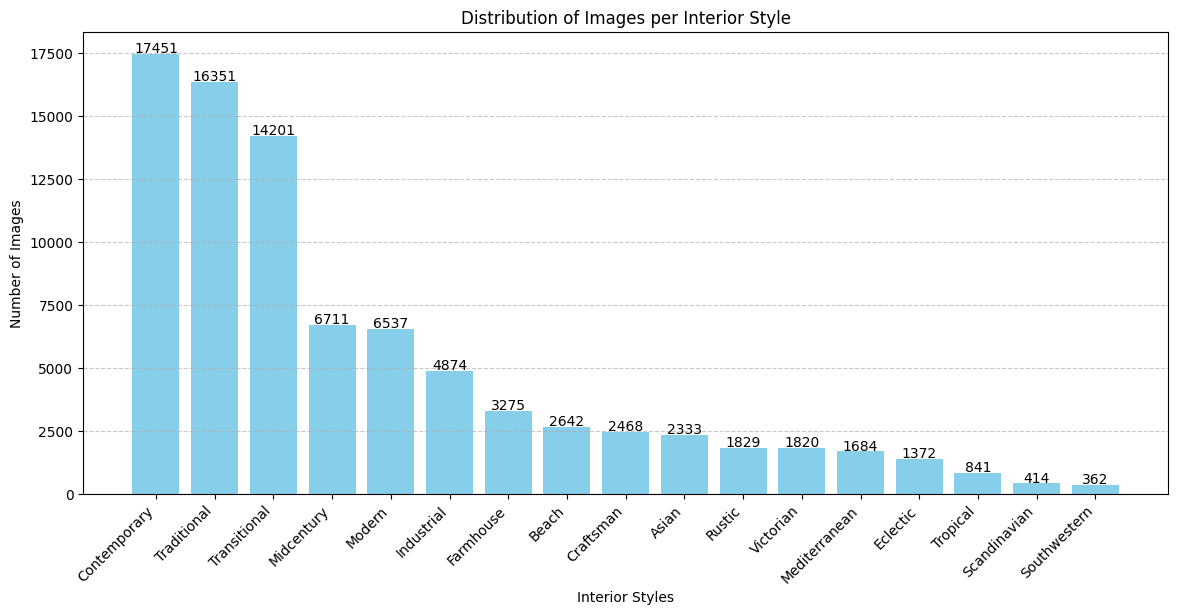

In [7]:
import os
import matplotlib.pyplot as plt

data_dir = "/content/Task3_Data"

style_counts = {}
for style in os.listdir(data_dir):
    if style.startswith("."):
        continue
    style_path = os.path.join(data_dir, style)
    if os.path.isdir(style_path):
        style_counts[style] = len(os.listdir(style_path))

style_counts = dict(sorted(style_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(14, 6))
plt.bar(style_counts.keys(), style_counts.values(), color='skyblue')
plt.xlabel("Interior Styles")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Interior Style")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(style_counts.values()):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

In [8]:
import os
import shutil
import random
import numpy as np
from PIL import Image, ImageEnhance

data_dir = "/content/Task3_Data"
output_dir = "/content/Split_Dataset"

train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")

for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

split_ratios = {"train": 0.7, "val": 0.15, "test": 0.15}

style_counts = {}
for style in os.listdir(data_dir):
    style_path = os.path.join(data_dir, style)
    if not os.path.isdir(style_path):
        continue
    images = os.listdir(style_path)
    random.shuffle(images)

    num_images = len(images)
    num_train = int(num_images * split_ratios["train"])
    num_val = int(num_images * split_ratios["val"])

    style_counts[style] = num_images

    for i, img in enumerate(images):
        src_path = os.path.join(style_path, img)
        if i < num_train:
            dest_folder = os.path.join(train_dir, style)
        elif i < num_train + num_val:
            dest_folder = os.path.join(val_dir, style)
        else:
            dest_folder = os.path.join(test_dir, style)

        os.makedirs(dest_folder, exist_ok=True)
        shutil.copy(src_path, dest_folder)

print("\n Success split dataset!")


 Success split dataset!


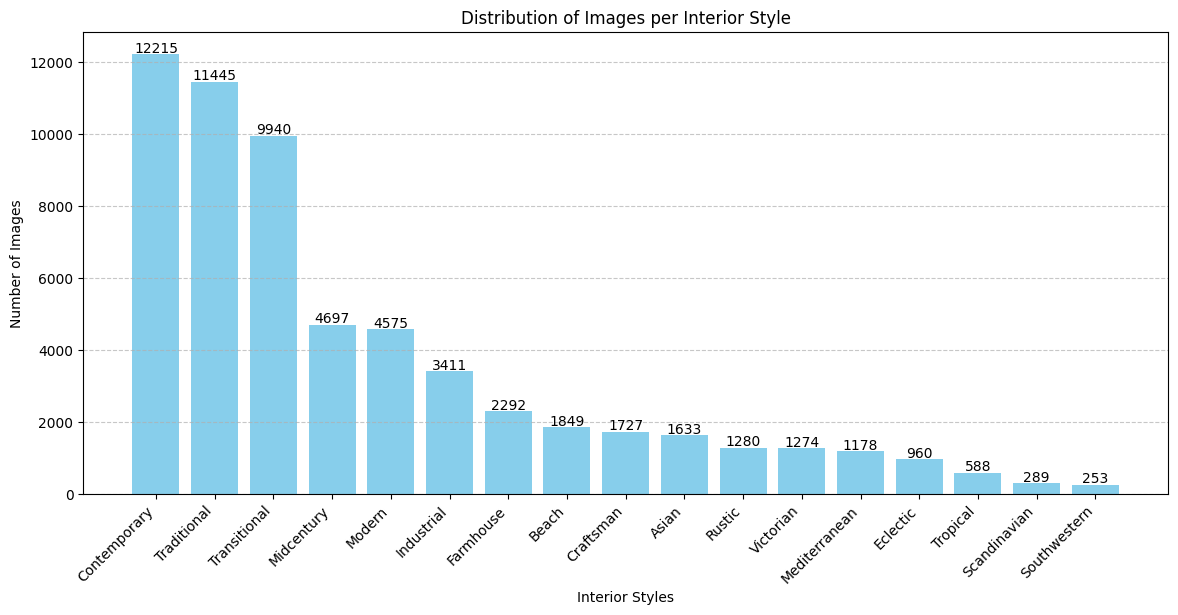

In [9]:
import os
import matplotlib.pyplot as plt

train_dir = "/content/Split_Dataset/train"

style_counts = {}
for style in os.listdir(train_dir):
    if style.startswith("."):
        continue
    style_path = os.path.join(train_dir, style)
    if os.path.isdir(style_path):
        style_counts[style] = len(os.listdir(style_path))

style_counts = dict(sorted(style_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(14, 6))
plt.bar(style_counts.keys(), style_counts.values(), color='skyblue')
plt.xlabel("Interior Styles")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Interior Style")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(style_counts.values()):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

In [18]:
from sklearn.utils import resample
import numpy as np
import pandas as pd

def count_images(category_path):
    count = 0
    for root, _, files in os.walk(category_path):
        count += sum(1 for file in files if file.lower().endswith(('.jpg', '.png', '.jpeg')))
    return count

styles = ["Contemporary", "Traditional", "Transitional", "Midcentury", "Modern", "Southwestern",
          "Farmhouse", "Victorian", "Rustic", "Beach", "Scandinavian", "Mediterranean",
          "Craftsman", "Asian", "Industrial", "Eclectic", "Tropical"]

style_counts = {style: count_images(os.path.join('/content/Split_Dataset/train', style)) for style in styles}

# Example: Oversample minority classes
df = pd.DataFrame.from_dict(style_counts, orient="index", columns=["Image Count"])
df = df.sort_values("Image Count", ascending=True)
minority_classes = df[:12].index.to_numpy()  # Convert index to NumPy array
majority_classes = df[12:].index.to_numpy()
print(majority_classes)
print(minority_classes)

['Transitional' 'Traditional' 'Contemporary']
['Farmhouse' 'Southwestern' 'Victorian' 'Craftsman' 'Mediterranean'
 'Scandinavian' 'Beach' 'Rustic' 'Industrial' 'Asian' 'Eclectic'
 'Tropical' 'Modern' 'Midcentury']


In [11]:
import math

class_counts = {}
for class_name in os.listdir('/content/Split_Dataset/train'):
    class_path = os.path.join('/content/Split_Dataset/train', class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

mean_samples = math.ceil(sum(class_counts.values()) / len(class_counts))
print(f"The average class has {mean_samples} samples")

print(f"Minority classes: {minority_classes}")

for class_name in minority_classes:
    class_path = os.path.join('/content/Split_Dataset/train', class_name)
    images = os.listdir(class_path)

    if len(images) < mean_samples:
        num_samples_needed = mean_samples - len(images)

        new_images = resample(images, replace=True, n_samples=num_samples_needed, random_state=42)

        for i, img in enumerate(new_images):
            src_path = os.path.join(class_path, img)
            dst_path = os.path.join(class_path, f"aug_{i}_{img}")
            shutil.copy(src_path, dst_path)

        print(f"Oversampled {class_name}: Added {num_samples_needed} images")

for class_name in majority_classes:
        class_path = os.path.join('/content/Split_Dataset/train', class_name)
        images = os.listdir(class_path)

        if len(images) > mean_samples:
            num_samples_to_remove = len(images) - mean_samples

            # Randomly select images to remove
            images_to_remove = random.sample(images, num_samples_to_remove)

            for img in images_to_remove:
                img_path = os.path.join(class_path, img)
                os.remove(img_path)  # Delete the file

            print(f"✅ Undersampled {class_name}: Removed {num_samples_to_remove} images")

Majority class has 3507 samples
Minority classes: ['Southwestern' 'Scandinavian' 'Tropical' 'Eclectic' 'Mediterranean'
 'Victorian' 'Rustic' 'Asian' 'Craftsman' 'Beach' 'Farmhouse' 'Industrial'
 'Modern' 'Midcentury']
Oversampled Southwestern: Added 3254 images
Oversampled Scandinavian: Added 3218 images
Oversampled Tropical: Added 2919 images
Oversampled Eclectic: Added 2547 images
Oversampled Mediterranean: Added 2329 images
Oversampled Victorian: Added 2233 images
Oversampled Rustic: Added 2227 images
Oversampled Asian: Added 1874 images
Oversampled Craftsman: Added 1780 images
Oversampled Beach: Added 1658 images
Oversampled Farmhouse: Added 1215 images
Oversampled Industrial: Added 96 images


In [22]:
majority_classes = ['Transitional', 'Traditional', 'Contemporary', 'Midcentury', 'Modern']
for class_name in majority_classes:
        class_path = os.path.join('/content/Split_Dataset/train', class_name)
        images = os.listdir(class_path)

        if len(images) > mean_samples:
            num_samples_to_remove = len(images) - mean_samples

            # Randomly select images to remove
            images_to_remove = random.sample(images, num_samples_to_remove)

            for img in images_to_remove:
                img_path = os.path.join(class_path, img)
                os.remove(img_path)  # Delete the file

            print(f"✅ Undersampled {class_name}: Removed {num_samples_to_remove} images")

✅ Undersampled Midcentury: Removed 1190 images
✅ Undersampled Modern: Removed 1068 images


In [20]:
print(class_counts)

{'Traditional': 11445, 'Southwestern': 253, 'Farmhouse': 2292, 'Victorian': 1274, 'Rustic': 1280, 'Beach': 1849, 'Midcentury': 4697, 'Scandinavian': 289, 'Mediterranean': 1178, 'Craftsman': 1727, 'Modern': 4575, 'Asian': 1633, 'Industrial': 3411, 'Eclectic': 960, 'Contemporary': 12215, 'Transitional': 9940, 'Tropical': 588}


{'Midcentury': 3507, 'Modern': 3507, 'Contemporary': 3507, 'Traditional': 3507, 'Transitional': 3507, 'Southwestern': 3507, 'Farmhouse': 3507, 'Victorian': 3507, 'Rustic': 3507, 'Beach': 3507, 'Scandinavian': 3507, 'Mediterranean': 3507, 'Craftsman': 3507, 'Asian': 3507, 'Industrial': 3507, 'Eclectic': 3507, 'Tropical': 3507}


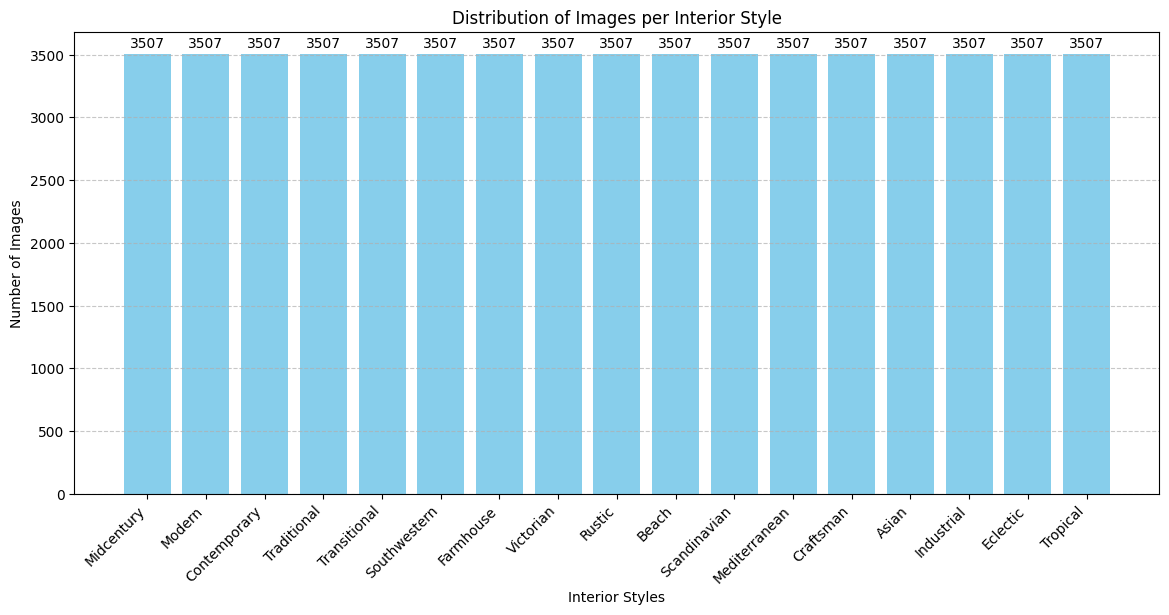

In [23]:
import os
import matplotlib.pyplot as plt

for style in os.listdir('/content/Split_Dataset/train'):
    if style.startswith("."):
        continue
    style_path = os.path.join('/content/Split_Dataset/train', style)
    if os.path.isdir(style_path):
        style_counts[style] = len(os.listdir(style_path))

style_counts = dict(sorted(style_counts.items(), key=lambda x: x[1], reverse=True))
print(style_counts)

plt.figure(figsize=(14, 6))
plt.bar(style_counts.keys(), style_counts.values(), color='skyblue')
plt.xlabel("Interior Styles")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Interior Style")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(style_counts.values()):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=15,  # Rotate images by ±15 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1,  # Shift images vertically by up to 10%
    shear_range=0.1,  # Shear images by up to 10%
    zoom_range=0.1,  # Zoom in/out by up to 10%
    horizontal_flip=True,  # Flip images horizontally
    brightness_range=[0.8, 1.2],  # Adjust brightness
    fill_mode='nearest'  # Fill missing pixels after transformations
)

# Load dataset with augmentation
train_generator = train_datagen.flow_from_directory(
    directory='/content/Split_Dataset/train',
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32, #Increased
    class_mode='categorical'  # Use 'binary' for binary classification
)


# For validation and test sets, use only rescaling (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

val_generator = val_test_datagen.flow_from_directory(
    directory='/content/Split_Dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    directory='/content/Split_Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

abc = train_generator.class_indices

print("Class indices of train:", train_generator.class_indices)
print("Class indices of val:", val_generator.class_indices)
print("Class indices of test:", test_generator.class_indices)

Found 59618 images belonging to 17 classes.
Found 12768 images belonging to 17 classes.
Found 12791 images belonging to 17 classes.
Class indices of train: {'Asian': 0, 'Beach': 1, 'Contemporary': 2, 'Craftsman': 3, 'Eclectic': 4, 'Farmhouse': 5, 'Industrial': 6, 'Mediterranean': 7, 'Midcentury': 8, 'Modern': 9, 'Rustic': 10, 'Scandinavian': 11, 'Southwestern': 12, 'Traditional': 13, 'Transitional': 14, 'Tropical': 15, 'Victorian': 16}
Class indices of val: {'Asian': 0, 'Beach': 1, 'Contemporary': 2, 'Craftsman': 3, 'Eclectic': 4, 'Farmhouse': 5, 'Industrial': 6, 'Mediterranean': 7, 'Midcentury': 8, 'Modern': 9, 'Rustic': 10, 'Scandinavian': 11, 'Southwestern': 12, 'Traditional': 13, 'Transitional': 14, 'Tropical': 15, 'Victorian': 16}
Class indices of test: {'Asian': 0, 'Beach': 1, 'Contemporary': 2, 'Craftsman': 3, 'Eclectic': 4, 'Farmhouse': 5, 'Industrial': 6, 'Mediterranean': 7, 'Midcentury': 8, 'Modern': 9, 'Rustic': 10, 'Scandinavian': 11, 'Southwestern': 12, 'Traditional': 13, 

In [39]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

image_counts = style_counts

sorted_image_counts = np.array([image_counts[class_name] for class_name in abc.keys()])

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.arange(len(abc)),
    y=np.concatenate([[i] * count for i, count in enumerate(sorted_image_counts)])
)

class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print(abc, ": ",class_weight_dict)


{'Asian': 0, 'Beach': 1, 'Contemporary': 2, 'Craftsman': 3, 'Eclectic': 4, 'Farmhouse': 5, 'Industrial': 6, 'Mediterranean': 7, 'Midcentury': 8, 'Modern': 9, 'Rustic': 10, 'Scandinavian': 11, 'Southwestern': 12, 'Traditional': 13, 'Transitional': 14, 'Tropical': 15, 'Victorian': 16} :  {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0}


In [26]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [40]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model-building function
def build_model(hp):
    model = Sequential()

    # Convolutional layers with tunable filter size
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(5,5), activation='relu', padding='same', input_shape=(224, 224, 3) # Changed to 5x5 to capture large features first
    ))
    model.add(BatchNormalization())
    #model.add(MaxPooling2D(pool_size=(2, 2))) # Try 2 conv layers before pooling

    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=64),
        kernel_size=(3,3), padding='same'
    ))
    model.add(BatchNormalization())
    model.add(Activation('relu')) # After Batch to reduce the number of parameters, less overfitting

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv3_filters', min_value=128, max_value=512, step=128),
        kernel_size=(3,3), padding='same'
    ))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2))) # Try 2 conv layers before pooling

    model.add(Conv2D(
        filters=hp.Int('conv4_filters', min_value=256, max_value=512, step=256),
        kernel_size=(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(GlobalAveragePooling2D())  # Replaces Flatten() to reduce overfitting
    #model.add(Flatten())

    # Fully connected layers with tunable units
    model.add(Dense(
        units=hp.Int('dense1_units', min_value=128, max_value=1024, step=128),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(17, activation='softmax'))

    # Compile the model with tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True
)

# Define the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=15,
    factor=3,
    directory='kt_hyperband',
    project_name='furniture_tuning'
)

# Display the search space
tuner.search_space_summary()

Search space summary
Default search space size: 7
conv1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
conv2_filters (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
conv3_filters (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
conv4_filters (Int)
{'default': None, 'conditions': [], 'min_value': 256, 'max_value': 512, 'step': 256, 'sampling': 'linear'}
dense1_units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 128, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0005, 0.0001], 'ordered': True}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Run the hyperparameter search
tuner.search(
    train_generator,  # Training dataset
    validation_data=val_generator,  # Validation dataset
    epochs=10,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparam eters: {best_hps.values}")


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
32                |32                |conv1_filters
256               |256               |conv2_filters
128               |128               |conv3_filters
512               |512               |dense1_units
0.4               |0.4               |dropout_rate
0.001             |0.001             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2


KeyboardInterrupt: 

In [41]:
from keras_tuner import HyperParameters

# Manually define the best hyperparameters
best_hps = HyperParameters()
best_hps.Fixed('conv1_filters', 32)
best_hps.Fixed('conv2_filters', 128)
best_hps.Fixed('conv3_filters', 256)
best_hps.Fixed('conv4_filters', 512)
best_hps.Fixed('dense1_units', 384) # Reduced
best_hps.Fixed('dropout_rate', 0.2)
best_hps.Fixed('learning_rate', 0.001)

0.001

In [42]:
# Adds a learning rate scheduler (testing)
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the ReduceLROnPlateau callback
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Reduce LR when validation loss stops improving
    factor=0.5,          # Reduce LR by 50%
    patience=3,          # Wait 3 epochs before reducing LR
    min_lr=1e-4          # Minimum LR to prevent going too low
)


In [ ]:
# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(train_generator, validation_data=val_generator, epochs=15, callbacks=[early_stopping, lr_scheduler])

# Save the best model
best_model.save("classification_style_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1272s 655ms/step - accuracy: 0.1633 - loss: 2.6221 - val_accuracy: 0.0597 - val_loss: 3.2183 - learning_rate: 0.0010
Epoch 2/15
 307/1864 ━━━━━━━━━━━━━━━━━━━━ 15:57 615ms/step - accuracy: 0.2293 - loss: 2.4081

In [ ]:
from tensorflow import keras

best_model.save("classification_style_model.keras")

In [ ]:
best_model.evaluate(test_generator)

800/800 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.2055 - loss: 2.4821


[2.4888851642608643, 0.2047533392906189]